In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.patches import Rectangle

from ipywidgets import interact
import ipywidgets as widgets

# Likelihood I

## Binomial distribution

### The Bernoulli distribution

A random variable $A$ which can take one of two discrete states with a probability $\theta$ of taking the first state (like you have seen above) is called a Bernoulli RV.  Its probability mass function is

\begin{align}
    P(A = 1) = \theta
\end{align}

Pretty straightforward, right? The standard example is a coin toss, where $\theta = \frac{1}{2}$ for a fair coin. For this reason, it is often called a "success" in the statistical literature when the RV is equal to one.

Let's look at the probability mass function. Notice how it is pretty much the same as our area plot in the first notebook.

In [8]:
@interact(theta=widgets.FloatSlider(min=0., max=1., value=0.5, description=r"$\theta$"))
def plot_bernoulli_pmf(theta):
    bar = plt.bar([0, 1], [1-theta, theta])
    bar[1].set_color("C1")

    plt.ylim(0, 1)

interactive(children=(FloatSlider(value=0.5, description='$\\theta$', max=1.0), Output()), _dom_classes=('widg…

### The binomial distribution

It becomes a little more interesting when we sample $n$ Bernoulli RVs and ask the question how many of them are equal to 1. This number of successes $k$ for a sequence of $n$ Bernoulli trials is called a binomial RV. The probability mass function is:

\begin{align}
    P(X = k | \theta) = {n \choose k} \theta^k (1 - \theta)^{n - k}.
\end{align}

The first term in the equation ${n \choose k}$ is the number of possible ways for choosing $k$ out of $n$ elements. It is known as the binomial coefficient, hence the name of the distribution. The next term is the probability that $k$ successes followed by the probability of $n - k$ failures. Take a look at the binomial distribution for different values of $n$, and $\theta$. 

In [9]:
from scipy.special import comb

def binomial_pmf(theta, n, k):
    return comb(n, k) * theta**k * (1 - theta)**(n - k)

@interact(theta=widgets.FloatSlider(min=0., max=1., value=0.5, description=r"$\theta$"),
         n=widgets.IntSlider(min=1, max=100, step=1, value=10), description=r"$n$")
def plot_binomial(theta, n):
    k = np.arange(0, n + 1)
    
    p = binomial_pmf(theta, n, k)
    
    plt.bar(k, p)
    plt.xlabel(r"$k$")
    plt.ylabel(r"$p(k | \theta)$")

interactive(children=(FloatSlider(value=0.5, description='$\\theta$', max=1.0), IntSlider(value=10, descriptio…

Notice how:

- the distribution becomes more skewed when $\theta$ is closer to 0 or 1
- the Bernoulli distribution is special case of the binomial for $n = 1$
- ...

## The likelihood function

The probability mass function of the binomial distribution as seen in the visualization above gives you the probability of each value of $k$ given a fixed $\theta$. It is the conditional distribution of $k$ given $\theta$. In most realistic scenarios, however, we do not know the true probability $\theta$, but merely have a measurement of $k$ and $n$. For example, in a decision making task, we have observed that a subject has made $k = 24$ correct decisions in $n = 32$ trials. We now want to know their probability of making a correct decision. It seems straightforward to say "Of course it is 24 / 32 =  0.75". But why is that? Can we make our intuition more formal?

We can do this by introducing the concept of a likelihood function. The likelihood function is the probability mass function $P(X = k | \theta)$ as a function of $\theta$. It is not a probability distribution w.r.t. $\theta$, since it does not normalize to 1 when integrating over all possible values of $\theta$.

Let us look at the likelihood function. It tells us how likely the data we observed are given different values of $\theta$. Implement the following steps:

1. Choose a true value for $\theta$
2. Sample the number of successes $k$ for a number of trials $n$ from the Binomial distribution, see https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html
3. Plot the likelihood function.
4. What would be a good guess $\hat \theta$ about $\theta$ based on this likelihood function? Does this agree with our intuition from above?

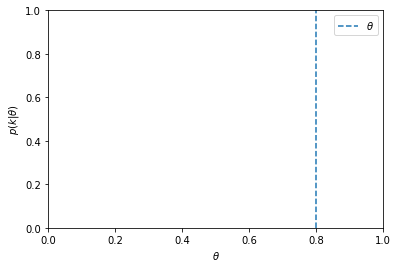

In [41]:
from scipy import stats

theta_true = 0.8 # as an example
n = 32 # as an example
k = ... # your code here


def plot_likelihood(n, k, theta_true):
    theta = np.linspace(0, 1, 100)
    
    # compute and plot the likelihood function
    ... # your code here
    
    plt.axvline(theta_true, label=r"$\theta$", linestyle="--")
    
    plt.legend()
    plt.xlabel(r"$\theta$")
    plt.ylabel(r"$p(k | \theta)$")

plot_likelihood(n, k, theta_true)

Now, repeat this process 100 times:
1. Sample $k$ for a given $n$ and $\theta$
2. Compute the maximum likelihood estimate $\hat\theta$

Collect your results in a `numpy.array` and try to answer the following questions: Is the maximum likelihood estimate of $\theta$ "correct" on average? How does the number of trials $n$ influence this?

In [ ]:
# your code here

# Maximum Likelihood II

## Gaussian distribution

Now, we are doing basically the same thing for the Gaussian distribution. 

1. Generate some data $D = \{x_1, \dots, x_n\}$ from a Gaussian distribution with a true mean $\mu$ of your choice and standard deviation fiexed at $\sigma = 1$, see https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
2. Plot a histogram of the data
3. Based on these data, what should your estimate $\hat \mu$ about the mean be, intuitively?

In [1]:
n = 25
mu_true = 10 # for example

# your code here
x = ...

...

Ellipsis

### Likelihood function

1. Compute the likelihood function $p(D \, | \, \mu)$ for a range of different values for $\mu$. Use the fact that the individual data points $x_i$ are identically and independently distributed (i.i.d.)
2. Plot the likelihood function. Where is its maximum at?

In [ ]:
# your code here